## What Recommendation Systems are?

Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

## About This Notebook

This Notebook attempts to expain how we can make a simple content based Film Recommendation Engine.
A content Based technique is a way to find similarity based on the content of the movie a user watches.
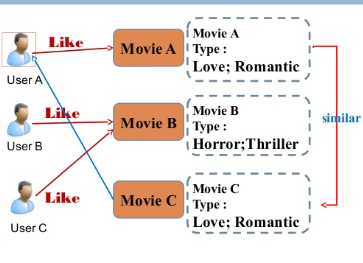

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

## Loading DataSets

In [2]:
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')

-  The first dataset contains the following features:-
    -  movie_id - A unique identifier for each movie.
    -  cast - The name of lead and supporting actors.
    -  crew - The name of Director, Editor, Composer, Writer etc.
    -  title - name of the movie
-  The second dataset has the following features:-
    -  budget - The budget in which the movie was made.
    -  genre - The genre of the movie, Action, Comedy ,Thriller etc.
    -  homepage - A link to the homepage of the movie.
    -  id - This is infact the movie_id as in the first dataset.
    -  keywords - The keywords or tags related to the movie.
    -  original_language - The language in which the movie was made.
    -  original_title - The title of the movie before translation or adaptation.
    -  overview - A brief description of the movie.
    -  popularity - A numeric quantity specifying the movie popularity.
    -  production_companies - The production house of the movie.
    -  production_countries - The country in which it was produced.
    -  release_date - The date on which it was released.
    -  revenue - The worldwide revenue generated by the movie.
    -  runtime - The running time of the movie in minutes.
    -  status - "Released" or "Rumored".
    -  tagline - Movie's tagline.
    -  title - Title of the movie.
    -  vote_average - average ratings the movie recieved.
    -  vote_count - the count of votes recieved.



In [3]:
movies.shape

(4803, 20)

In [4]:
credits.shape

(4803, 4)

In [5]:
movies.isnull().sum()#it tells us about how many null values are there in our Dataset 

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
credits.isnull().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

Since there are no missing values of id in both the dataframes.Let us join both the Df's on ID
But first we have to rename the column name "**movie_id**" in credits dataframe to just "**id**" as to match to our movies dataframe. 

In [7]:
credits.rename(columns={'movie_id':'id'},inplace=True)#renaming
movies=movies.merge(credits,on='id')#merging two dataframe to one inplace algorithm 
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## What Now?

Now we are going to read correlate each overview with one another and keep a record of it . Suppose we have to suggest 10 movies based on a movie we watched , it will map to the highly corelated 10 movies with the given particuular movie.
For the general purpose content based filtering we do not need any of the other parameters(other than "**overview**") but for a
personalized recommender we can play with our recommender to give us more suitable output . 
This notebook will implement a model which will suggest 10 movies based solely on content **i.e** it will not exclude movies on the basis of any **other variables**(rating,language,genre).

## Text to Vectors 

For our text-preprocessing part we are going to words to vectors. 
Now we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.

## Why not Bag of Words?

In this problem Bag of Words would not be that useful as it gives equal weightage to all the words in a particular document , whereas using diffrent weights for different words would make our recommendation engine more accurate. Using TF-IDF we can achieve wieghted distribution of words in the matrix of our overview vocabulary.
![image.png](https://miro.medium.com/max/839/1*V9ac4hLVyms79jl65Ym_Bw.jpeg)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
#An N-gram means a sequence of N words
#stop_word removes all the common keywords of the language specified .(only 'en' supported)
#strip_accents Remove accents and perform other character normalization during the preprocessing step
#min_df is the threshold for document frequency , words that occur < min_df in the document are ignored
#analyzer specifies if our features should be individual words or characters . 
#tokken_pattern specifies separators that will be used to as a basis to tokenize words.
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
movies['overview'] = movies['overview'].fillna('')
#Construct the required TF-IDF matrix by fitting and transforming the data
tfv_matrix = tfv.fit_transform(movies['overview'])
tfv_matrix.shape

(4803, 10417)

## Similarity Score

A & B are our feature vectors . Suppose A as movie M1 & B as movie M2 then the cos(θ) represents the similarity score between them.The less the distance between A & B the more similar they are . remember cos(dist)=1-cos(θ).

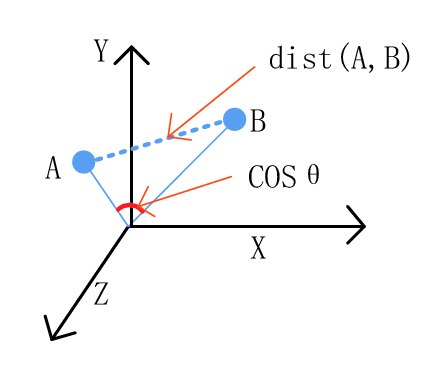
![image.png](https://miro.medium.com/max/1912/1*YObjpgE_1qOTavYe9as-sg.png)

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [9]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfv_matrix, tfv_matrix)

I am going to define a function that will take input as a title a particular movie and recommend 10 movies based on its content 
Therefore we need some kind of reverse mapping between our dataframe and indices.It should be very easy to do we can create a pandas series object with mapped indices and Titlles of movies. 

In [10]:
indices = pd.Series(movies.index, index=movies['title_x']).drop_duplicates()
indices[0:5]

title_x
Avatar                                      0
Pirates of the Caribbean: At World's End    1
Spectre                                     2
The Dark Knight Rises                       3
John Carter                                 4
dtype: int64

In [11]:
def get_rec(title,cosine_sim=cosine_sim):
    #get the index
    idx=indices[title]
    # Get the pairwsie similarity scores of all movies with that movie
    similar_scores = list(enumerate(cosine_sim[idx]))
    #sort the movies based on sim_scores
    similar_scores=sorted(similar_scores,key=lambda x:x[1],reverse=True)
    #get the top 10 recommendations
    similar_scores=similar_scores[1:11]
    #get indices
    movie_indices=[i[0] for i in similar_scores]
    #return top 10 movies to the function 
    return movies['title_x'].iloc[movie_indices]

In [12]:
get_rec('Batman Forever')

3                         The Dark Knight Rises
65                              The Dark Knight
119                               Batman Begins
1359                                     Batman
428                              Batman Returns
210                              Batman & Robin
3854    Batman: The Dark Knight Returns, Part 2
2507                                  Slow Burn
174                         The Incredible Hulk
9            Batman v Superman: Dawn of Justice
Name: title_x, dtype: object

In [13]:
get_rec('Titanic')

1269                                  Raise the Titanic
2289                                         The Switch
296                                         End of Days
2287                         I Can Do Bad All By Myself
2143                                         Ghost Ship
4287                                            Niagara
171     Master and Commander: The Far Side of the World
4035                                              Stung
4228                        The Ballad of Jack and Rose
104                                            Poseidon
Name: title_x, dtype: object

In [16]:
get_rec('Star Wars')

1990                         The Empire Strikes Back
1490                              Return of the Jedi
2556                              The Princess Bride
4574                                        Roadside
3191                        The Legend of Suriyothai
833                                    Shanghai Noon
610                           The Legend of Hercules
410                                    Mirror Mirror
1290                        Baahubali: The Beginning
229     Star Wars: Episode III - Revenge of the Sith
Name: title_x, dtype: object

In [18]:
get_rec('Slow Burn')

1181                                  JFK
879                   Law Abiding Citizen
2193                 Secret in Their Eyes
1202                         Legal Eagles
3                   The Dark Knight Rises
1349                Ghosts of Mississippi
3862                          Margin Call
65                        The Dark Knight
906     Anchorman 2: The Legend Continues
299                        Batman Forever
Name: title_x, dtype: object